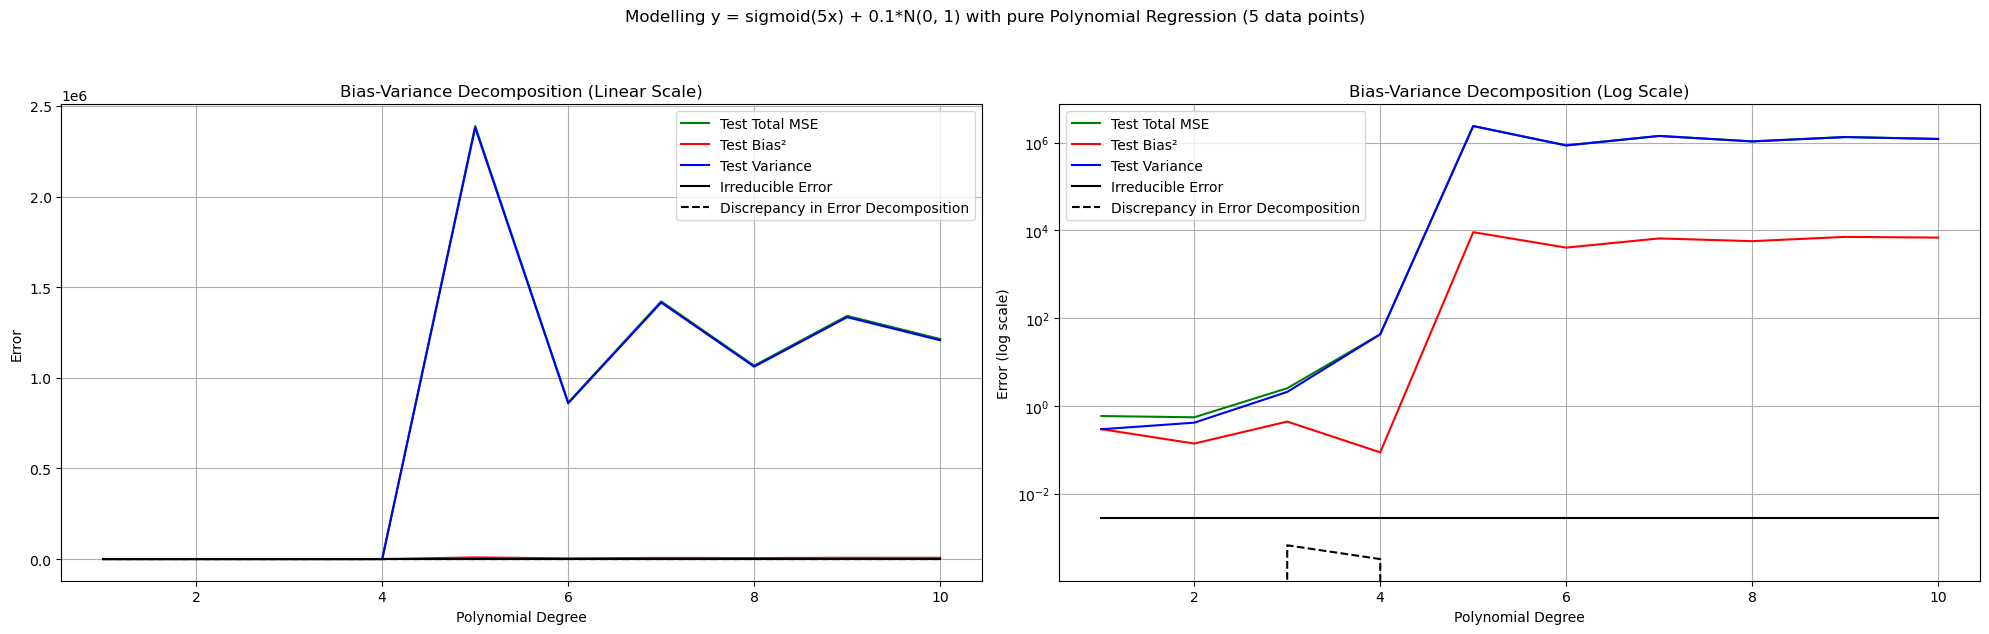

'print("\nNumerical Results:")\nfor degree in degrees:\n    idx = degree - 1\n    print(f"\nDegree {degree}:")\n    print(f"Bias²: {test_bias[idx]:.4f}")\n    print(f"Variance: {test_variance[idx]:.4f}")\n    print(f"Total Error: {(test_mse[idx]):.4f}")'

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(46)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 6
n_trials = 300
n_test = 100
noise_level = 0.05
degrees = range(1, 11)

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []
for _ in range(n_trials):
    X_train = np.random.uniform(-1, 1, n_points)
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points for evaluation
X_test = np.linspace(-1, 1, n_test)
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using pseudoinverse
        beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
        
        # Store predictions for both sets
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_predictions

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

#Breaking down the error into bias, variance and irreducible noise

#Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

#Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)

plt.figure(figsize=(20, 6))

# Linear scale subplot
plt.subplot(121)
plt.plot(degrees, test_mse, 'g-', label='Test Total MSE')
plt.plot(degrees, test_bias, 'r-', label='Test Bias²')
plt.plot(degrees, test_variance, 'b-', label='Test Variance')
plt.plot(degrees, test_noise, 'k-', label='Irreducible Error')
plt.plot(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
         label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(122)
plt.semilogy(degrees, test_mse, 'g-', label='Test Total MSE')
plt.semilogy(degrees, test_bias, 'r-', label='Test Bias²')
plt.semilogy(degrees, test_variance, 'b-', label='Test Variance')
plt.semilogy(degrees, test_noise, 'k-', label='Irreducible Error')
plt.semilogy(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
            label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error (log scale)')
plt.title('Bias-Variance Decomposition (Log Scale)')
plt.legend()
plt.grid(True)

plt.suptitle('Modelling y = sigmoid(5x) + 0.1*N(0, 1) with pure Polynomial Regression (5 data points)', y=1.05)
plt.tight_layout()
plt.show()
# Print numerical results
'''print("\nNumerical Results:")
for degree in degrees:
    idx = degree - 1
    print(f"\nDegree {degree}:")
    print(f"Bias²: {test_bias[idx]:.4f}")
    print(f"Variance: {test_variance[idx]:.4f}")
    print(f"Total Error: {(test_mse[idx]):.4f}")'''

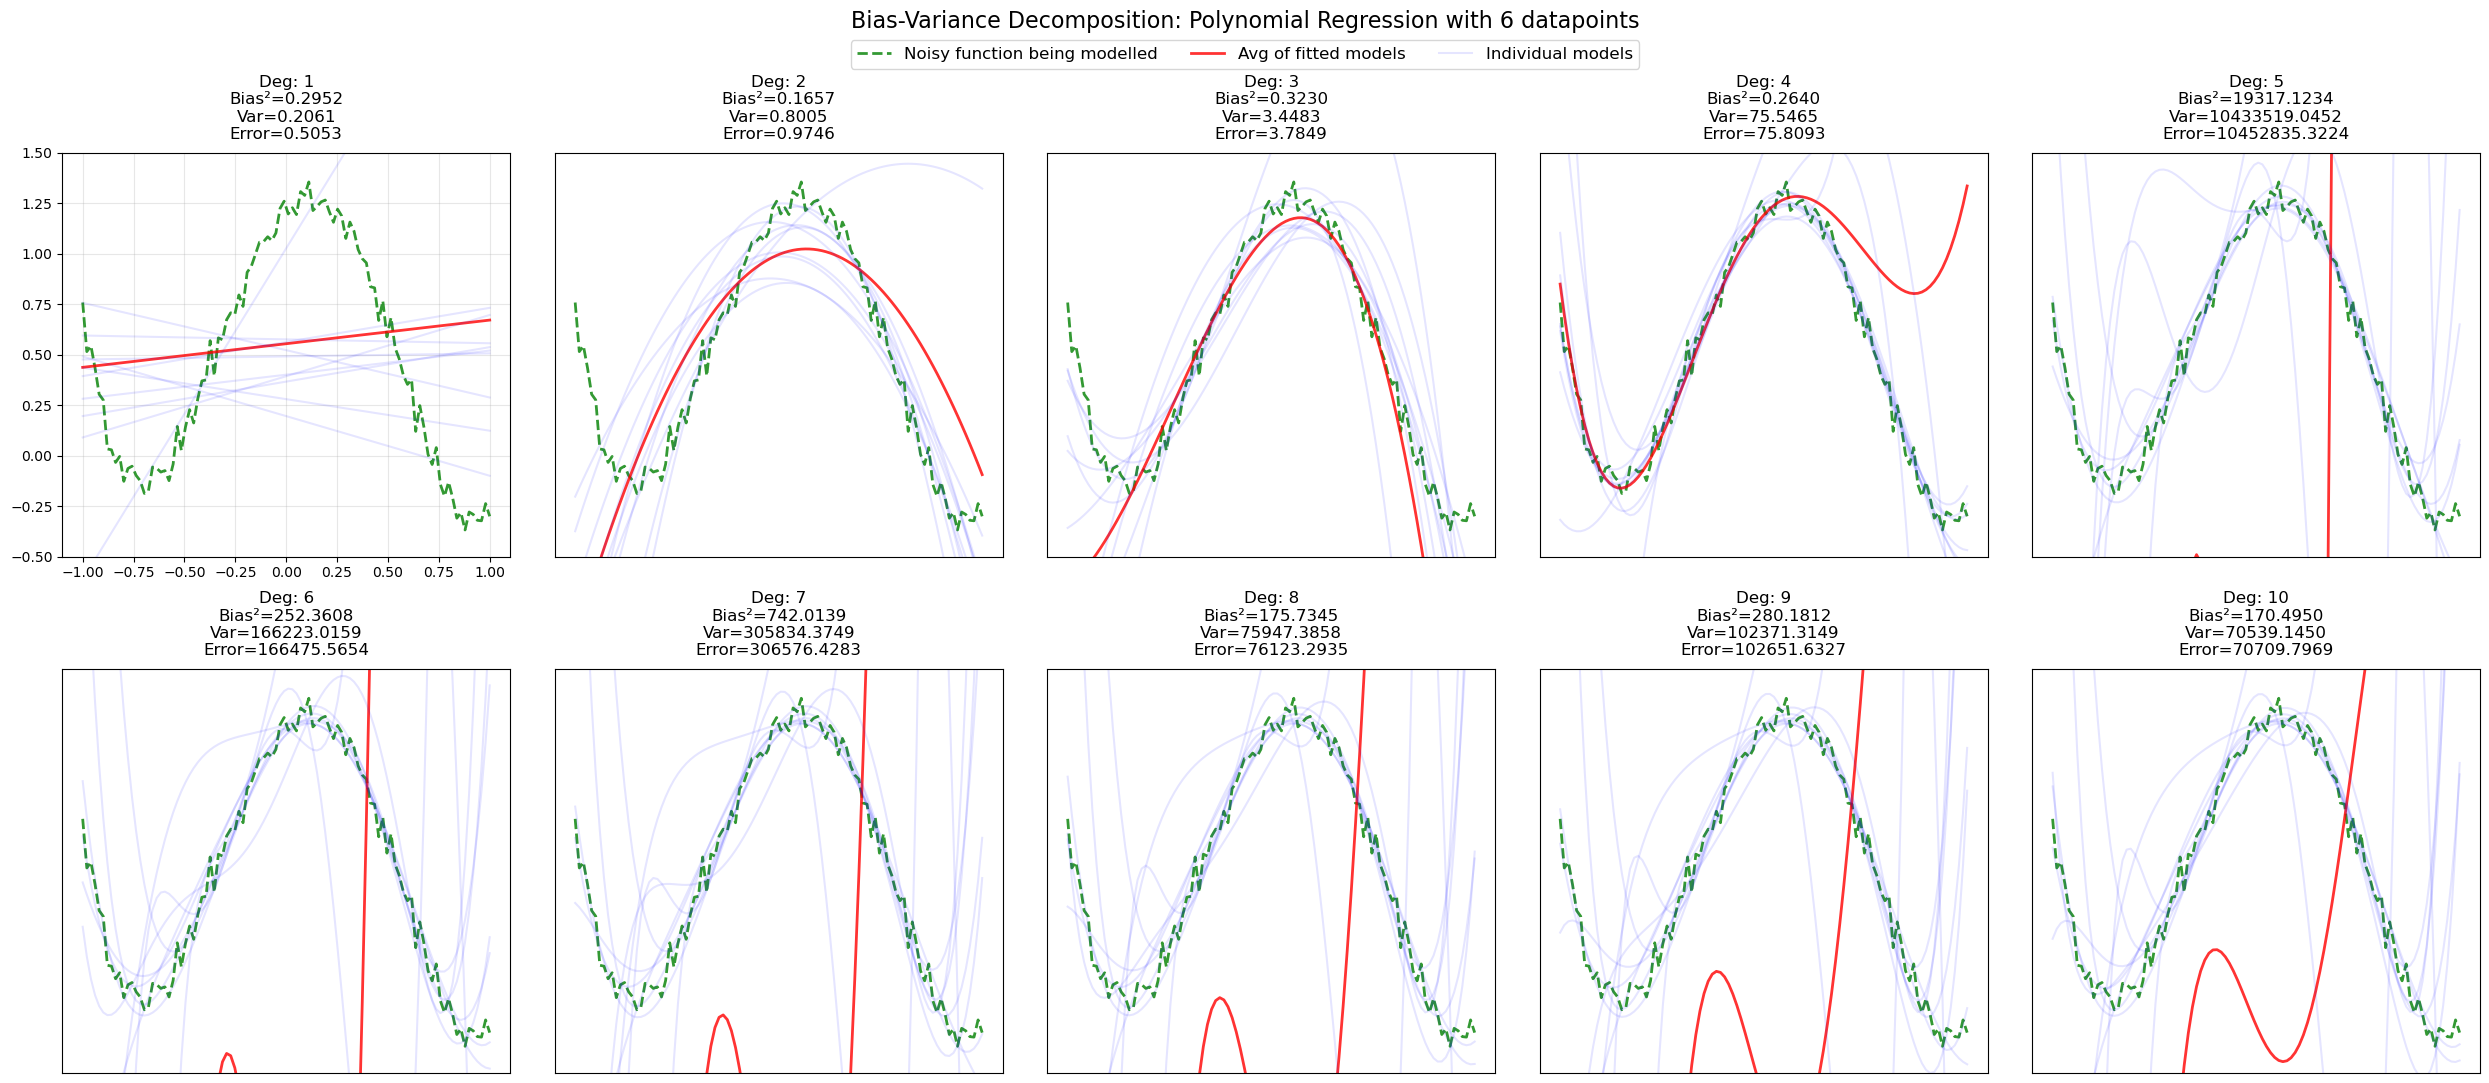

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 6
n_trials = 300
n_test = 100
noise_level = 0.05
degrees = range(1, 11)

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []
for _ in range(n_trials):
    X_train = np.random.uniform(-1, 1, n_points)
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points for evaluation
X_test = np.linspace(-1, 1, n_test)
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions for both test and training sets
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using pseudoinverse
        beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
        
        # Store predictions for both sets
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_predictions

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

#Breaking down the error into bias, variance and irreducible noise

#Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

#Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)


# Create figure
fig = plt.figure(figsize=(25, 11))  # Increased height slightly

# Add overall title
fig.suptitle('Bias-Variance Decomposition: Polynomial Regression with 6 datapoints', fontsize=16, y=0.98)

# Create common legend entries for all subplots
lines = []
labels = []
temp_ax = plt.subplot(2, 5, 1)
l1, = temp_ax.plot([], [], '--', color='green', label='Noisy function being modelled', alpha=0.8, linewidth=2)
l2, = temp_ax.plot([], [], 'r-', label='Avg of fitted models', alpha=0.8, linewidth=2)
l3, = temp_ax.plot([], [], 'b-', label='Individual models', alpha=0.1)
lines = [l1, l2, l3]
labels = ['Noisy function being modelled', 'Avg of fitted models', 'Individual models']

# Create legend at the top
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96),
          ncol=3, fontsize=12)

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 5, i)
    
    # Plot true function
    plt.plot(X_test, y_test, '--', color='green', alpha=0.8, linewidth=2)
    
    # Plot mean prediction
    plt.plot(X_test, mean_pred_by_degree[i-1], 'r-', alpha=0.8, linewidth=2)
    
    # Plot individual predictions (sample)
    for j in range(min(10, n_trials)):
        plt.plot(X_test, test_predictions[i-1, j], 'b-', alpha=0.1)
    
    plt.title(f'Deg: {degree}\nBias²={test_bias[i-1]:.4f}\nVar={test_variance[i-1]:.4f}\nError={test_mse[i-1]:.4f}',
              pad=10, fontsize=12)  # Increased fontsize
    plt.ylim(-0.5, 1.5)
    
    # Only show tick labels for leftmost plots
    if i != 1:
        plt.yticks([])
        plt.xticks([])
    
    plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
# Adjust the top margin to make room for title and legend
plt.subplots_adjust(top=0.85, wspace=0.1)  # Reduced wspace since we removed most tick labels
plt.show()

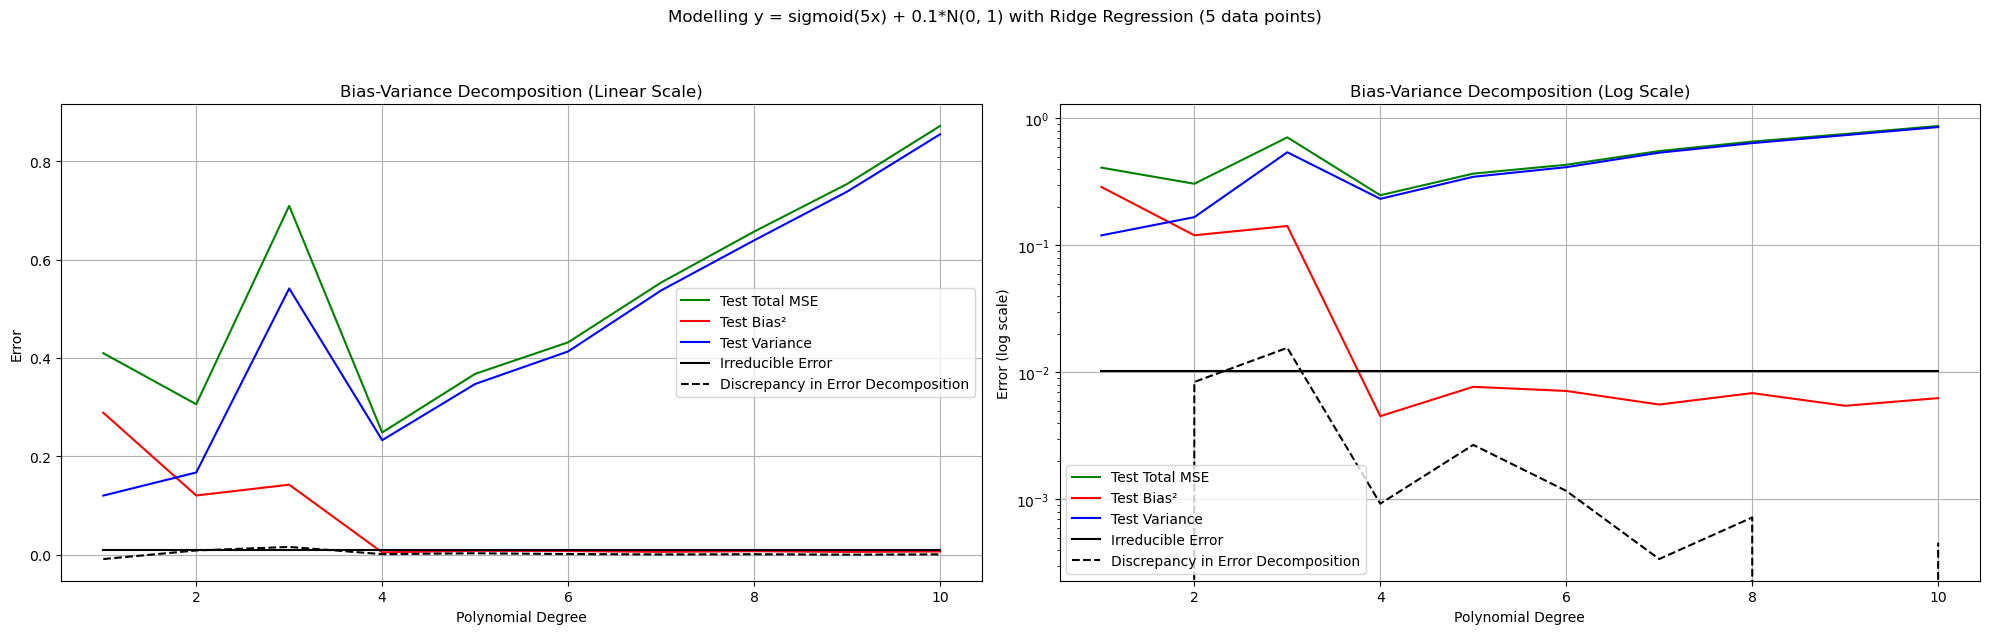


Numerical Results:

Degree 1:
Bias²: 0.2886
Variance: 0.1200
Total Error: 0.4096

Degree 2:
Bias²: 0.1202
Variance: 0.1669
Total Error: 0.3058

Degree 3:
Bias²: 0.1421
Variance: 0.5412
Total Error: 0.7092

Degree 4:
Bias²: 0.0045
Variance: 0.2327
Total Error: 0.2483

Degree 5:
Bias²: 0.0077
Variance: 0.3469
Total Error: 0.3675

Degree 6:
Bias²: 0.0071
Variance: 0.4131
Total Error: 0.4317

Degree 7:
Bias²: 0.0056
Variance: 0.5371
Total Error: 0.5533

Degree 8:
Bias²: 0.0069
Variance: 0.6390
Total Error: 0.6568

Degree 9:
Bias²: 0.0055
Variance: 0.7380
Total Error: 0.7536

Degree 10:
Bias²: 0.0063
Variance: 0.8547
Total Error: 0.8716


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

# Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 10
n_trials = 300
n_test = 100
noise_level = 0.1
degrees = range(1, 11)
lambda_param = 0.0001  # Ridge regression parameter

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []
for _ in range(n_trials):
    X_train = np.random.uniform(-1, 1, n_points)
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points for evaluation
X_test = np.linspace(-1, 1, n_test)
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using ridge regression
        # β = (X^T X + λI)^(-1) X^T y
        n_features = degree + 1
        identity_matrix = np.eye(n_features)
        XtX = X_train_poly.T @ X_train_poly
        Xty = X_train_poly.T @ y_trains[j]
        beta = np.linalg.solve(XtX + lambda_param * identity_matrix, Xty)
        
        # Store predictions
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

# Breaking down the error into bias, variance and irreducible noise

# Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

# Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)

plt.figure(figsize=(20, 6))

# Linear scale subplot
plt.subplot(121)
plt.plot(degrees, test_mse, 'g-', label='Test Total MSE')
plt.plot(degrees, test_bias, 'r-', label='Test Bias²')
plt.plot(degrees, test_variance, 'b-', label='Test Variance')
plt.plot(degrees, test_noise, 'k-', label='Irreducible Error')
plt.plot(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
         label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(122)
plt.semilogy(degrees, test_mse, 'g-', label='Test Total MSE')
plt.semilogy(degrees, test_bias, 'r-', label='Test Bias²')
plt.semilogy(degrees, test_variance, 'b-', label='Test Variance')
plt.semilogy(degrees, test_noise, 'k-', label='Irreducible Error')
plt.semilogy(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
            label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error (log scale)')
plt.title('Bias-Variance Decomposition (Log Scale)')
plt.legend()
plt.grid(True)

plt.suptitle('Modelling y = sigmoid(5x) + 0.1*N(0, 1) with Ridge Regression (5 data points)', y=1.05)
plt.tight_layout()
plt.show()

print("\nNumerical Results:")
for degree in degrees:
    idx = degree - 1
    print(f"\nDegree {degree}:")
    print(f"Bias²: {test_bias[idx]:.4f}")
    print(f"Variance: {test_variance[idx]:.4f}")
    print(f"Total Error: {(test_mse[idx]):.4f}")

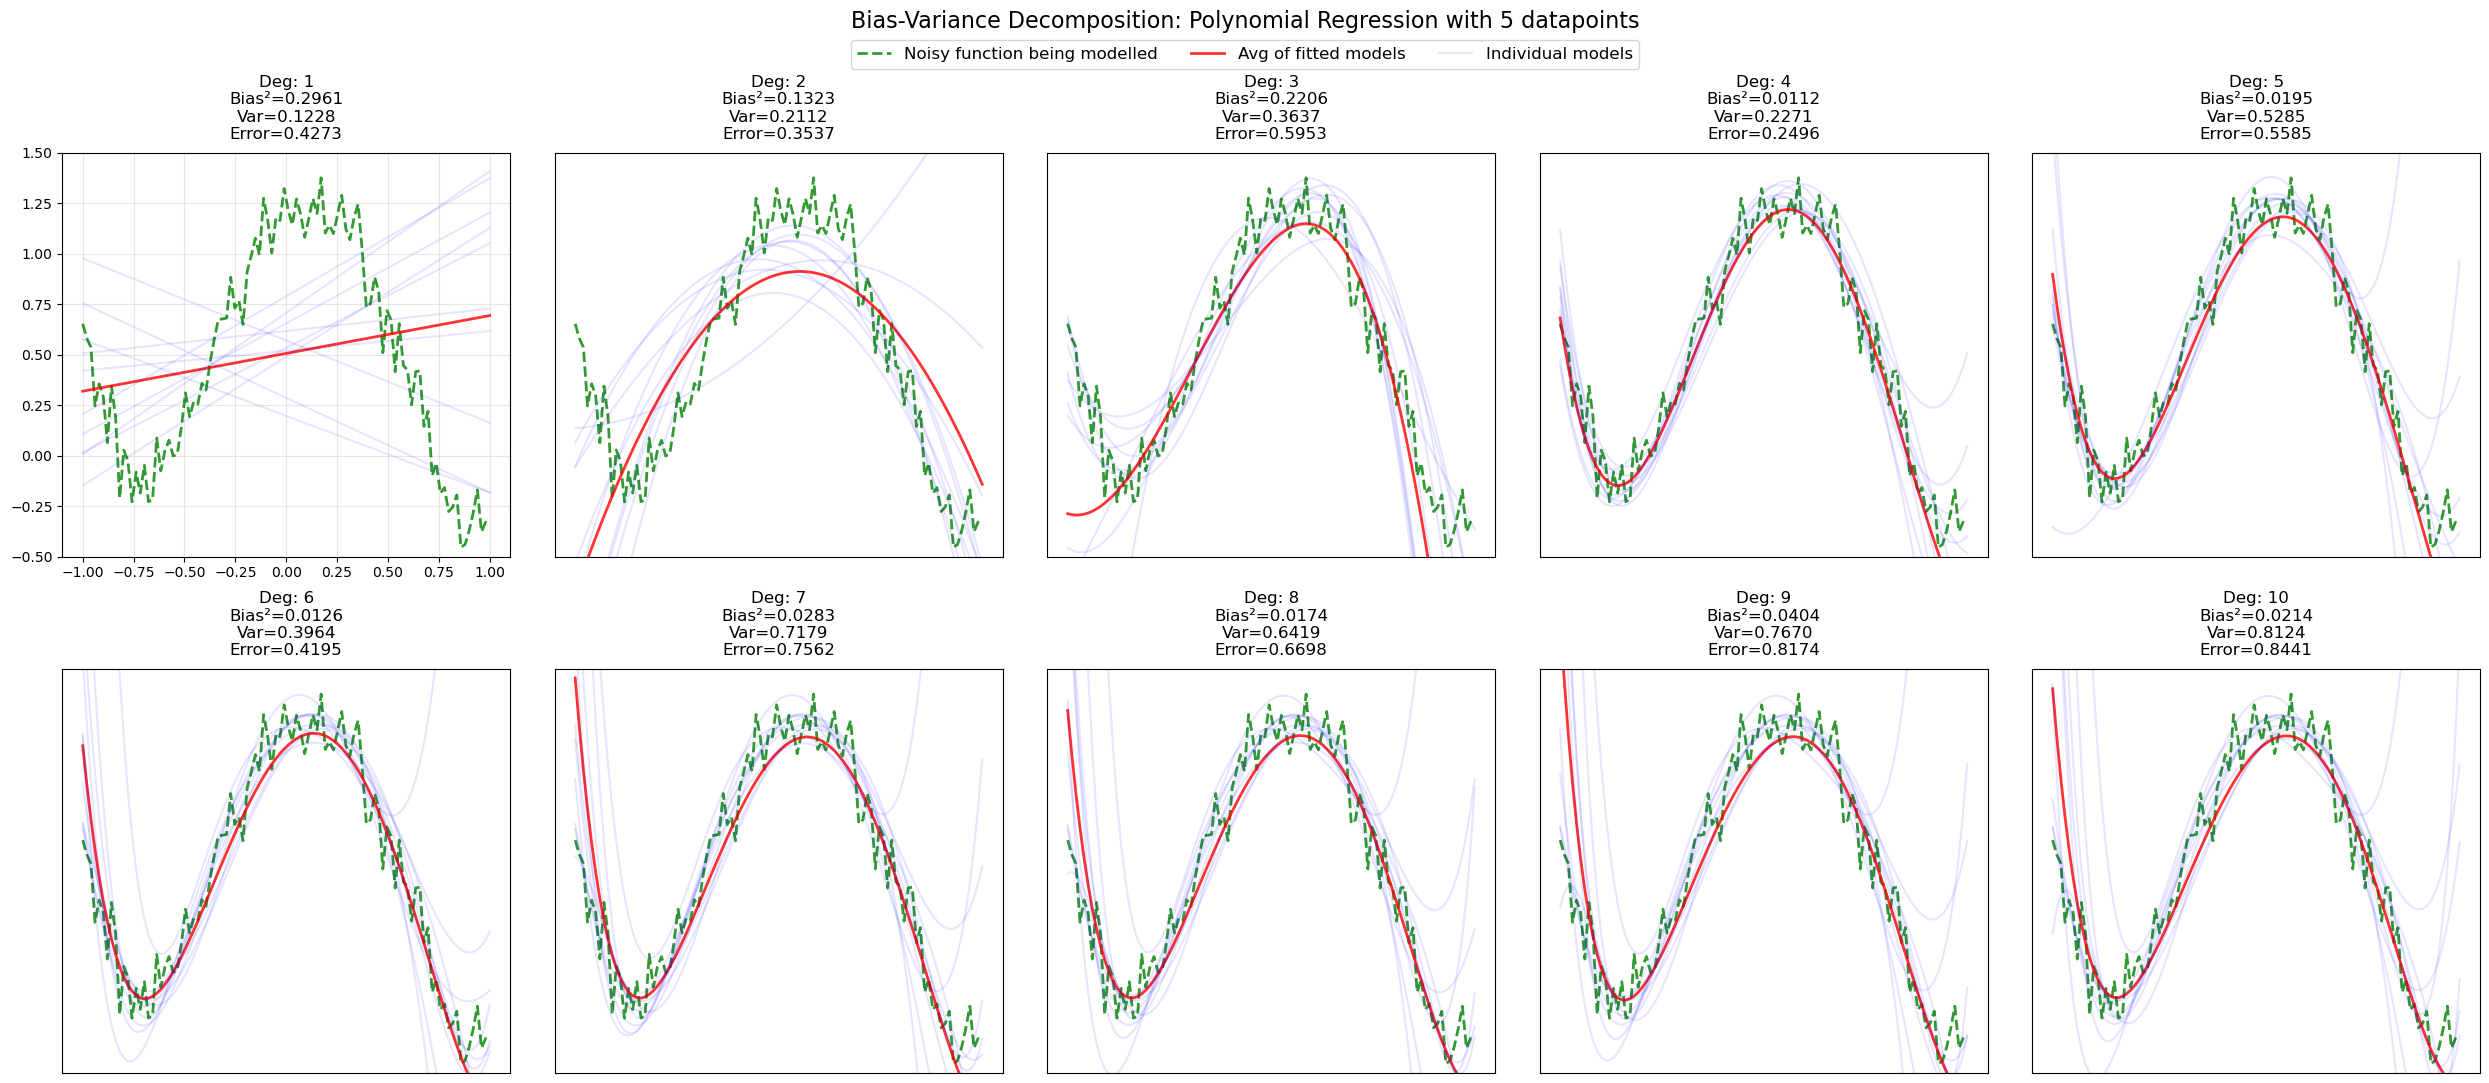

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

# Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 8
n_trials = 30
n_test = 100
noise_level = 0.1
degrees = range(1, 11)
lambda_param = 0.0001  # Ridge regression parameter

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []
for _ in range(n_trials):
    X_train = np.random.uniform(-1, 1, n_points)
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points for evaluation
X_test = np.linspace(-1, 1, n_test)
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using ridge regression
        # β = (X^T X + λI)^(-1) X^T y
        n_features = degree + 1
        identity_matrix = np.eye(n_features)
        XtX = X_train_poly.T @ X_train_poly
        Xty = X_train_poly.T @ y_trains[j]
        beta = np.linalg.solve(XtX + lambda_param * identity_matrix, Xty)
        
        # Store predictions
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

# Breaking down the error into bias, variance and irreducible noise

# Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

# Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)

# Create figure
fig = plt.figure(figsize=(25, 11))  # Increased height slightly

# Add overall title
fig.suptitle('Bias-Variance Decomposition: Polynomial Regression with 5 datapoints', fontsize=16, y=0.98)

# Create common legend entries for all subplots
lines = []
labels = []
temp_ax = plt.subplot(2, 5, 1)
l1, = temp_ax.plot([], [], '--', color='green', label='Noisy function being modelled', alpha=0.8, linewidth=2)
l2, = temp_ax.plot([], [], 'r-', label='Avg of fitted models', alpha=0.8, linewidth=2)
l3, = temp_ax.plot([], [], 'b-', label='Individual models', alpha=0.1)
lines = [l1, l2, l3]
labels = ['Noisy function being modelled', 'Avg of fitted models', 'Individual models']

# Create legend at the top
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96),
          ncol=3, fontsize=12)

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 5, i)
    
    # Plot true function
    plt.plot(X_test, y_test, '--', color='green', alpha=0.8, linewidth=2)
    
    # Plot mean prediction
    plt.plot(X_test, mean_pred_by_degree[i-1], 'r-', alpha=0.8, linewidth=2)
    
    # Plot individual predictions (sample)
    for j in range(min(10, n_trials)):
        plt.plot(X_test, test_predictions[i-1, j], 'b-', alpha=0.1)
    
    plt.title(f'Deg: {degree}\nBias²={test_bias[i-1]:.4f}\nVar={test_variance[i-1]:.4f}\nError={test_mse[i-1]:.4f}',
              pad=10, fontsize=12)  # Increased fontsize
    plt.ylim(-0.5, 1.5)
    
    # Only show tick labels for leftmost plots
    if i != 1:
        plt.yticks([])
        plt.xticks([])
    
    plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
# Adjust the top margin to make room for title and legend
plt.subplots_adjust(top=0.85, wspace=0.1)  # Reduced wspace since we removed most tick labels
plt.show()

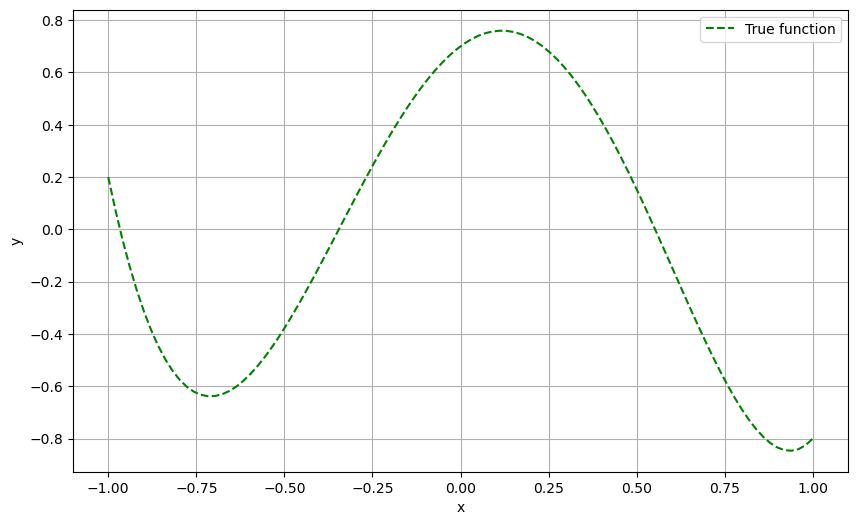

In [11]:
def sigmoid5(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 0.7
# Set random seed for reproducibility
np.random.seed(43)
n_points = 5
X_train = np.random.uniform(-1, 1, n_points)
y_train = sigmoid5(X_train) + 0.1 * np.random.normal(0, 1, n_points)
# Generate test points for smooth plotting
X_test = np.linspace(-1, 1, 100)
y_test_true = sigmoid5(X_test)  # True function without noise
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_true, '--', color='green', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Training Error

[-0.76989087  0.21813308 -0.73321807 -0.51882076 -0.34572189  0.71827498]


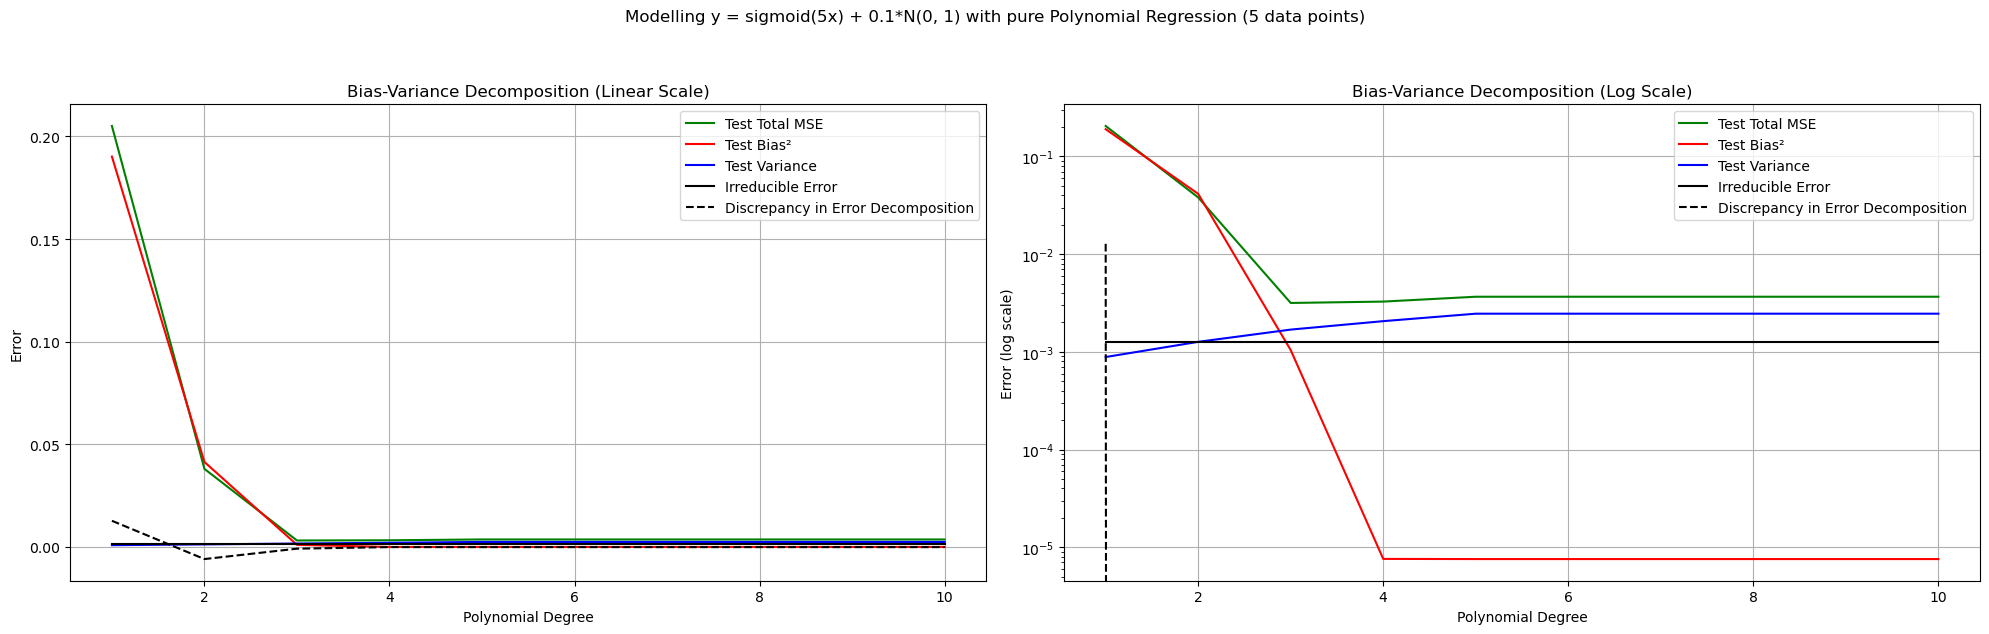

'print("\nNumerical Results:")\nfor degree in degrees:\n    idx = degree - 1\n    print(f"\nDegree {degree}:")\n    print(f"Bias²: {test_bias[idx]:.4f}")\n    print(f"Variance: {test_variance[idx]:.4f}")\n    print(f"Total Error: {(test_mse[idx]):.4f}")'

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 6
n_trials = 300
n_test = n_points
noise_level = 0.05
degrees = range(1, 11)

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []

#We fix the training points for all runs
X_train = np.random.uniform(-1, 1, n_points)
print(X_train)
for _ in range(n_trials):
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points have the same x-values but new y-values? this is the hastie tibshirani Same-X setting
X_test = X_train
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using pseudoinverse
        beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
        
        # Store predictions for both sets
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_predictions

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

#Breaking down the error into bias, variance and irreducible noise

#Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

#Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)

plt.figure(figsize=(20, 6))

# Linear scale subplot
plt.subplot(121)
plt.plot(degrees, test_mse, 'g-', label='Test Total MSE')
plt.plot(degrees, test_bias, 'r-', label='Test Bias²')
plt.plot(degrees, test_variance, 'b-', label='Test Variance')
plt.plot(degrees, test_noise, 'k-', label='Irreducible Error')
plt.plot(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
         label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(122)
plt.semilogy(degrees, test_mse, 'g-', label='Test Total MSE')
plt.semilogy(degrees, test_bias, 'r-', label='Test Bias²')
plt.semilogy(degrees, test_variance, 'b-', label='Test Variance')
plt.semilogy(degrees, test_noise, 'k-', label='Irreducible Error')
plt.semilogy(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
            label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error (log scale)')
plt.title('Bias-Variance Decomposition (Log Scale)')
plt.legend()
plt.grid(True)

plt.suptitle('Modelling y = sigmoid(5x) + 0.1*N(0, 1) with pure Polynomial Regression (5 data points)', y=1.05)
plt.tight_layout()
plt.show()
# Print numerical results
'''print("\nNumerical Results:")
for degree in degrees:
    idx = degree - 1
    print(f"\nDegree {degree}:")
    print(f"Bias²: {test_bias[idx]:.4f}")
    print(f"Variance: {test_variance[idx]:.4f}")
    print(f"Total Error: {(test_mse[idx]):.4f}")'''

Training Plots

[-0.76989087  0.21813308 -0.73321807 -0.51882076 -0.34572189  0.71827498]


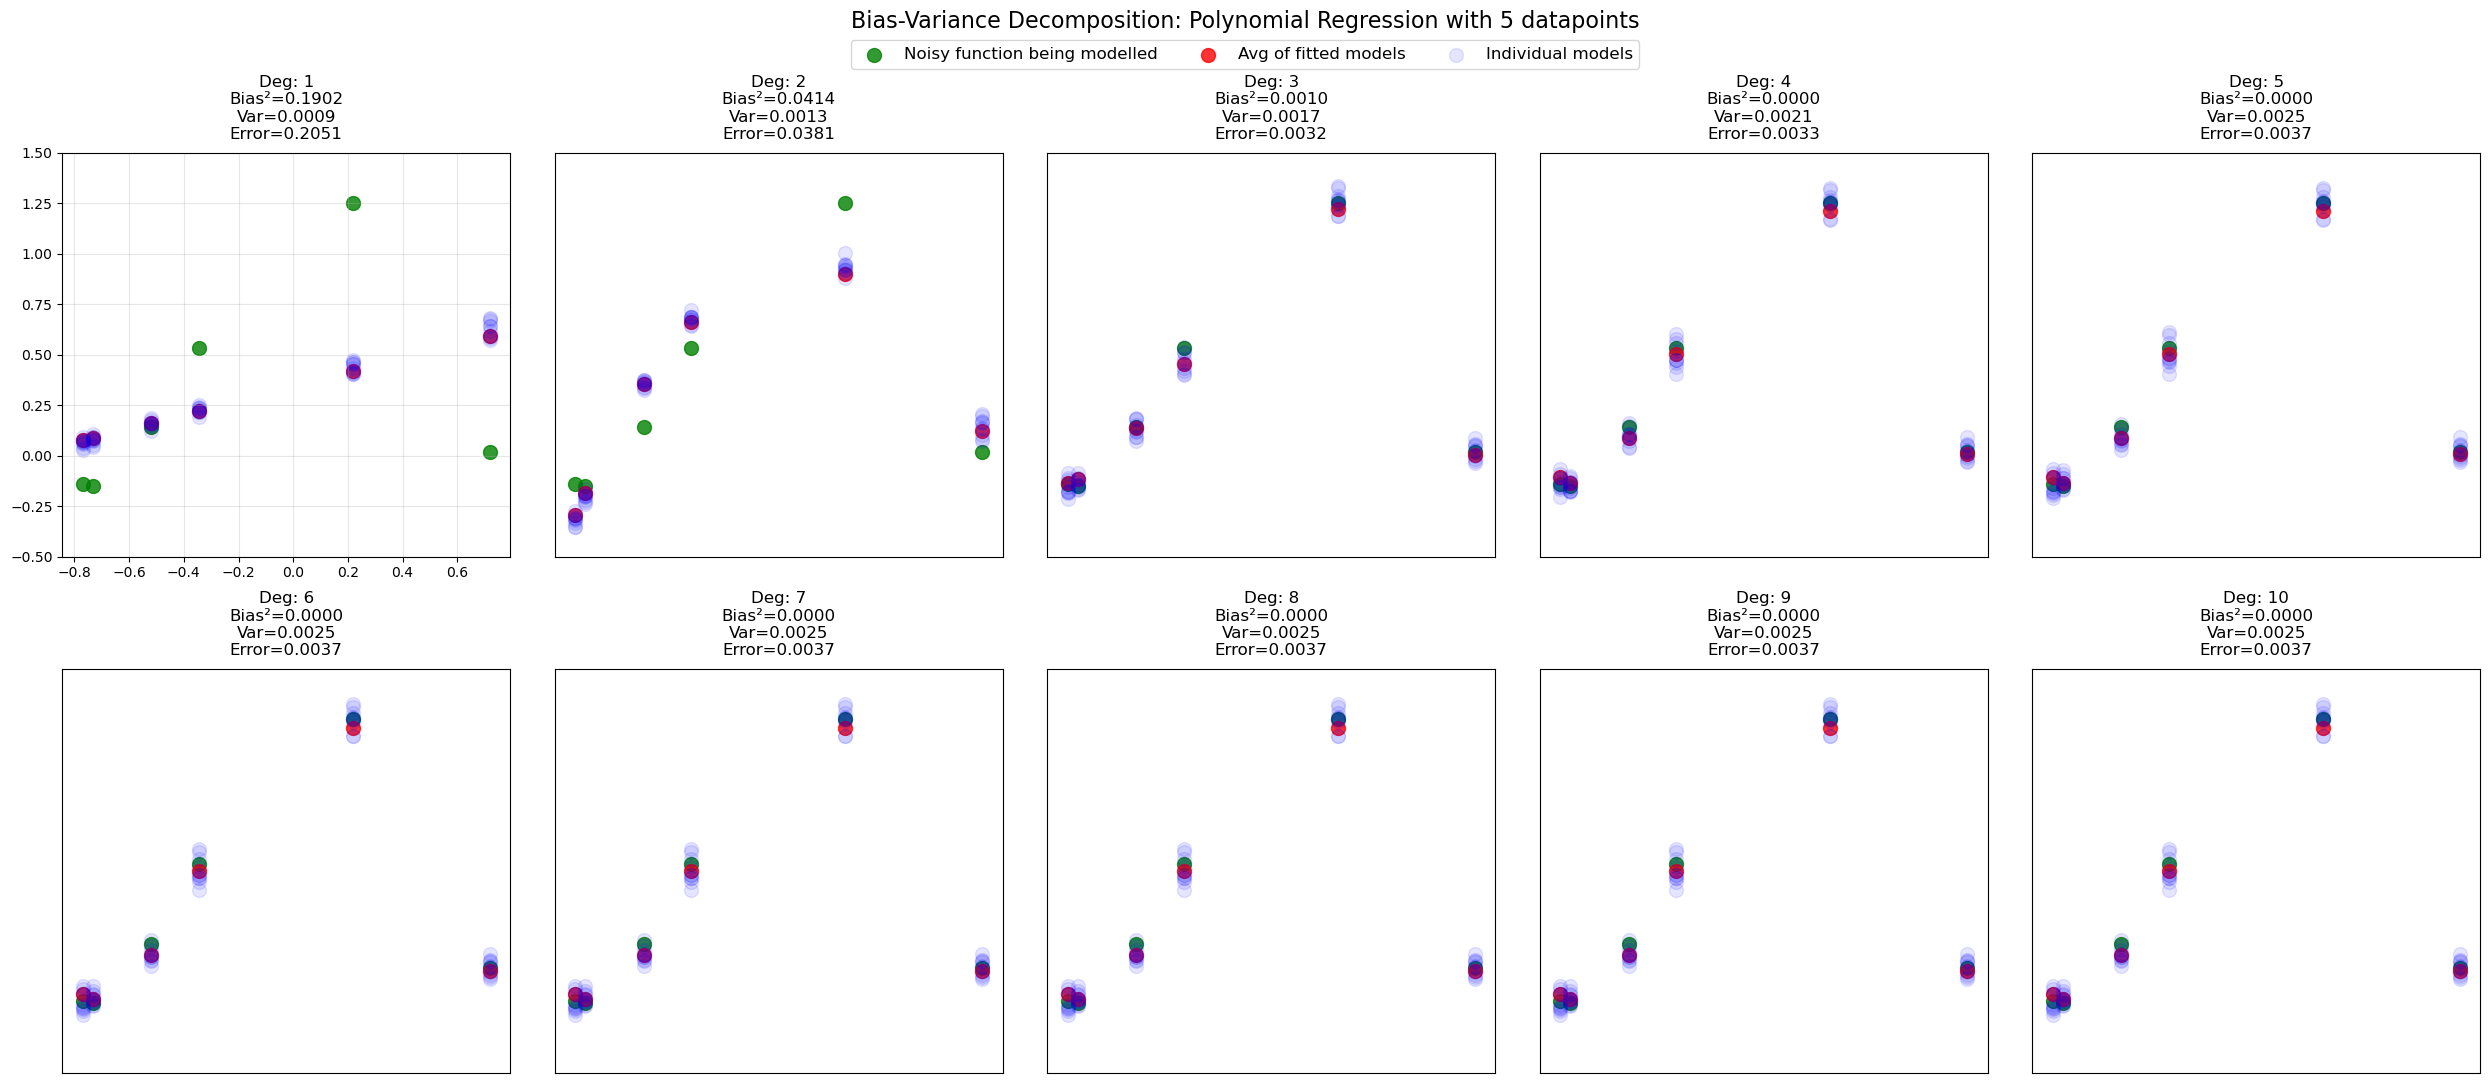

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 6
n_trials = 300
n_test = n_points
noise_level = 0.05
degrees = range(1, 11)

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []

#We fix the training points for all runs
X_train = np.random.uniform(-1, 1, n_points)
print(X_train)
for _ in range(n_trials):
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points have the same x-values but new y-values? this is the hastie tibshirani Same-X setting
X_test = X_train
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using pseudoinverse
        beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
        
        # Store predictions for both sets
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_predictions

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

#Breaking down the error into bias, variance and irreducible noise

#Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

#Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)

# Create figure
fig = plt.figure(figsize=(25, 11))

# Add overall title
fig.suptitle('Bias-Variance Decomposition: Polynomial Regression with 5 datapoints', fontsize=16, y=0.98)

# Create common legend entries for all subplots
lines = []
labels = []
temp_ax = plt.subplot(2, 5, 1)
l1 = temp_ax.scatter([], [], color='green', marker='o', label='Noisy function being modelled', alpha=0.8, s=100)
l2 = temp_ax.scatter([], [], color='red', marker='o', label='Avg of fitted models', alpha=0.8, s=100)
l3 = temp_ax.scatter([], [], color='blue', marker='o', label='Individual models', alpha=0.1, s=100)
lines = [l1, l2, l3]
labels = ['Noisy function being modelled', 'Avg of fitted models', 'Individual models']

# Create legend at the top
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96),
          ncol=3, fontsize=12)

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 5, i)
    
    # Plot true function (scatter)
    plt.scatter(X_test, y_test, color='green', alpha=0.8, s=100)
    
    # Plot mean prediction (scatter)
    plt.scatter(X_test, mean_pred_by_degree[i-1], color='red', alpha=0.8, s=100)
    
    # Plot individual predictions (sample)
    for j in range(min(10, n_trials)):
        plt.scatter(X_test, test_predictions[i-1, j], color='blue', alpha=0.1, s=100)
    
    plt.title(f'Deg: {degree}\nBias²={test_bias[i-1]:.4f}\nVar={test_variance[i-1]:.4f}\nError={test_mse[i-1]:.4f}',
              pad=10, fontsize=12)
    plt.ylim(-0.5, 1.5)
    
    # Only show tick labels for leftmost plots
    if i != 1:
        plt.yticks([])
        plt.xticks([])
    
    plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
# Adjust the top margin to make room for title and legend
plt.subplots_adjust(top=0.85, wspace=0.1)
plt.show()

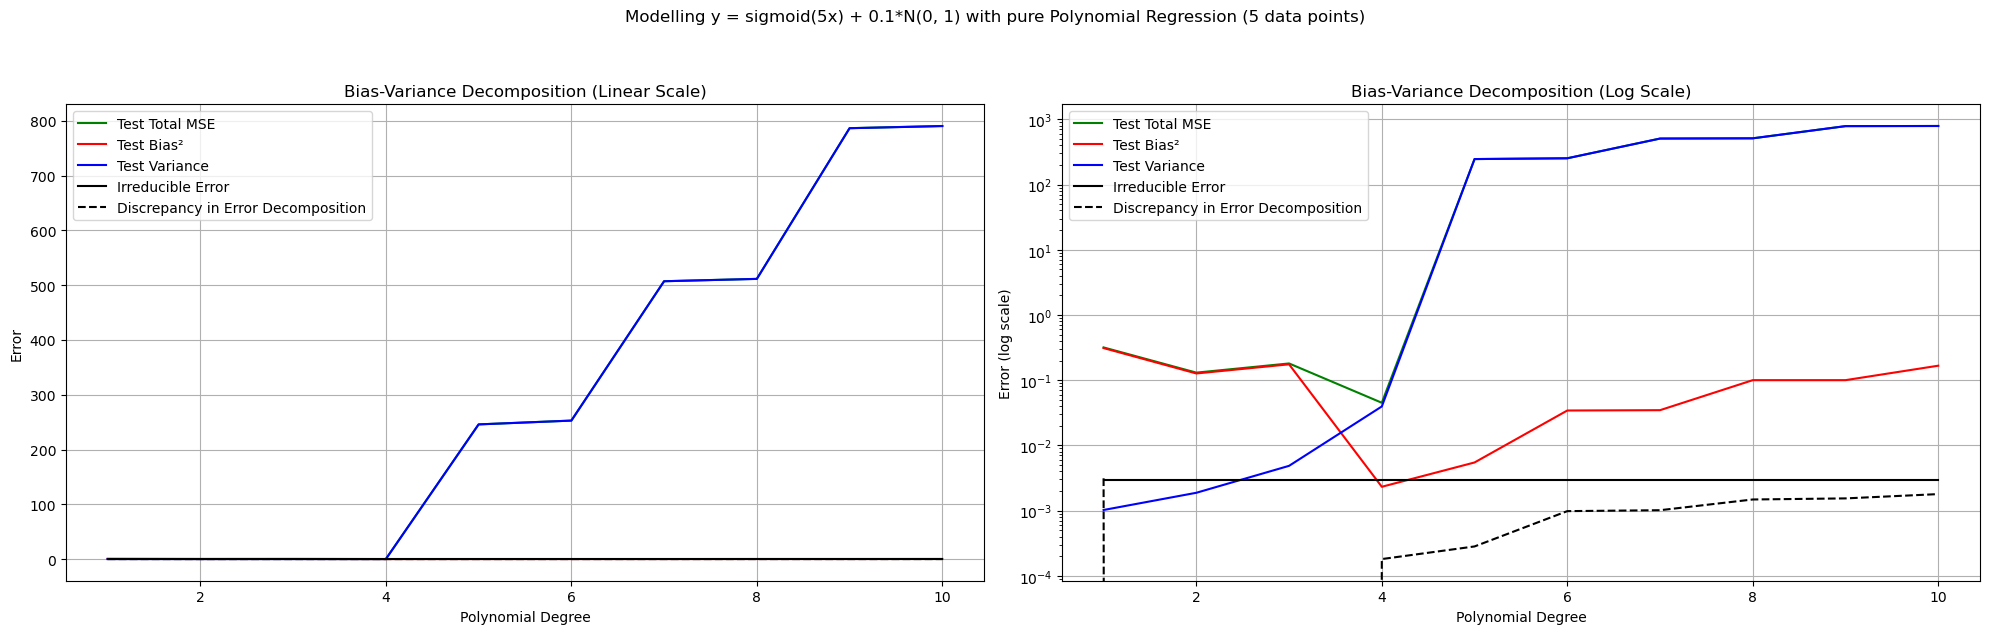

'print("\nNumerical Results:")\nfor degree in degrees:\n    idx = degree - 1\n    print(f"\nDegree {degree}:")\n    print(f"Bias²: {test_bias[idx]:.4f}")\n    print(f"Variance: {test_variance[idx]:.4f}")\n    print(f"Total Error: {(test_mse[idx]):.4f}")'

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(44)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 6
n_trials = 300
n_test = 100
noise_level = 0.05
degrees = range(1, 11)

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []

#We fix the training points for all runs
X_train = np.random.uniform(-1, 1, n_points)
for _ in range(n_trials):
    
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points for evaluation
X_test = np.linspace(-1, 1, n_test)
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using pseudoinverse
        beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
        
        # Store predictions for both sets
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_predictions

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

#Breaking down the error into bias, variance and irreducible noise

#Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

#Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)

plt.figure(figsize=(20, 6))

# Linear scale subplot
plt.subplot(121)
plt.plot(degrees, test_mse, 'g-', label='Test Total MSE')
plt.plot(degrees, test_bias, 'r-', label='Test Bias²')
plt.plot(degrees, test_variance, 'b-', label='Test Variance')
plt.plot(degrees, test_noise, 'k-', label='Irreducible Error')
plt.plot(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
         label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(122)
plt.semilogy(degrees, test_mse, 'g-', label='Test Total MSE')
plt.semilogy(degrees, test_bias, 'r-', label='Test Bias²')
plt.semilogy(degrees, test_variance, 'b-', label='Test Variance')
plt.semilogy(degrees, test_noise, 'k-', label='Irreducible Error')
plt.semilogy(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
            label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error (log scale)')
plt.title('Bias-Variance Decomposition (Log Scale)')
plt.legend()
plt.grid(True)

plt.suptitle('Modelling y = sigmoid(5x) + 0.1*N(0, 1) with pure Polynomial Regression (5 data points)', y=1.05)
plt.tight_layout()
plt.show()
# Print numerical results
'''print("\nNumerical Results:")
for degree in degrees:
    idx = degree - 1
    print(f"\nDegree {degree}:")
    print(f"Bias²: {test_bias[idx]:.4f}")
    print(f"Variance: {test_variance[idx]:.4f}")
    print(f"Total Error: {(test_mse[idx]):.4f}")'''

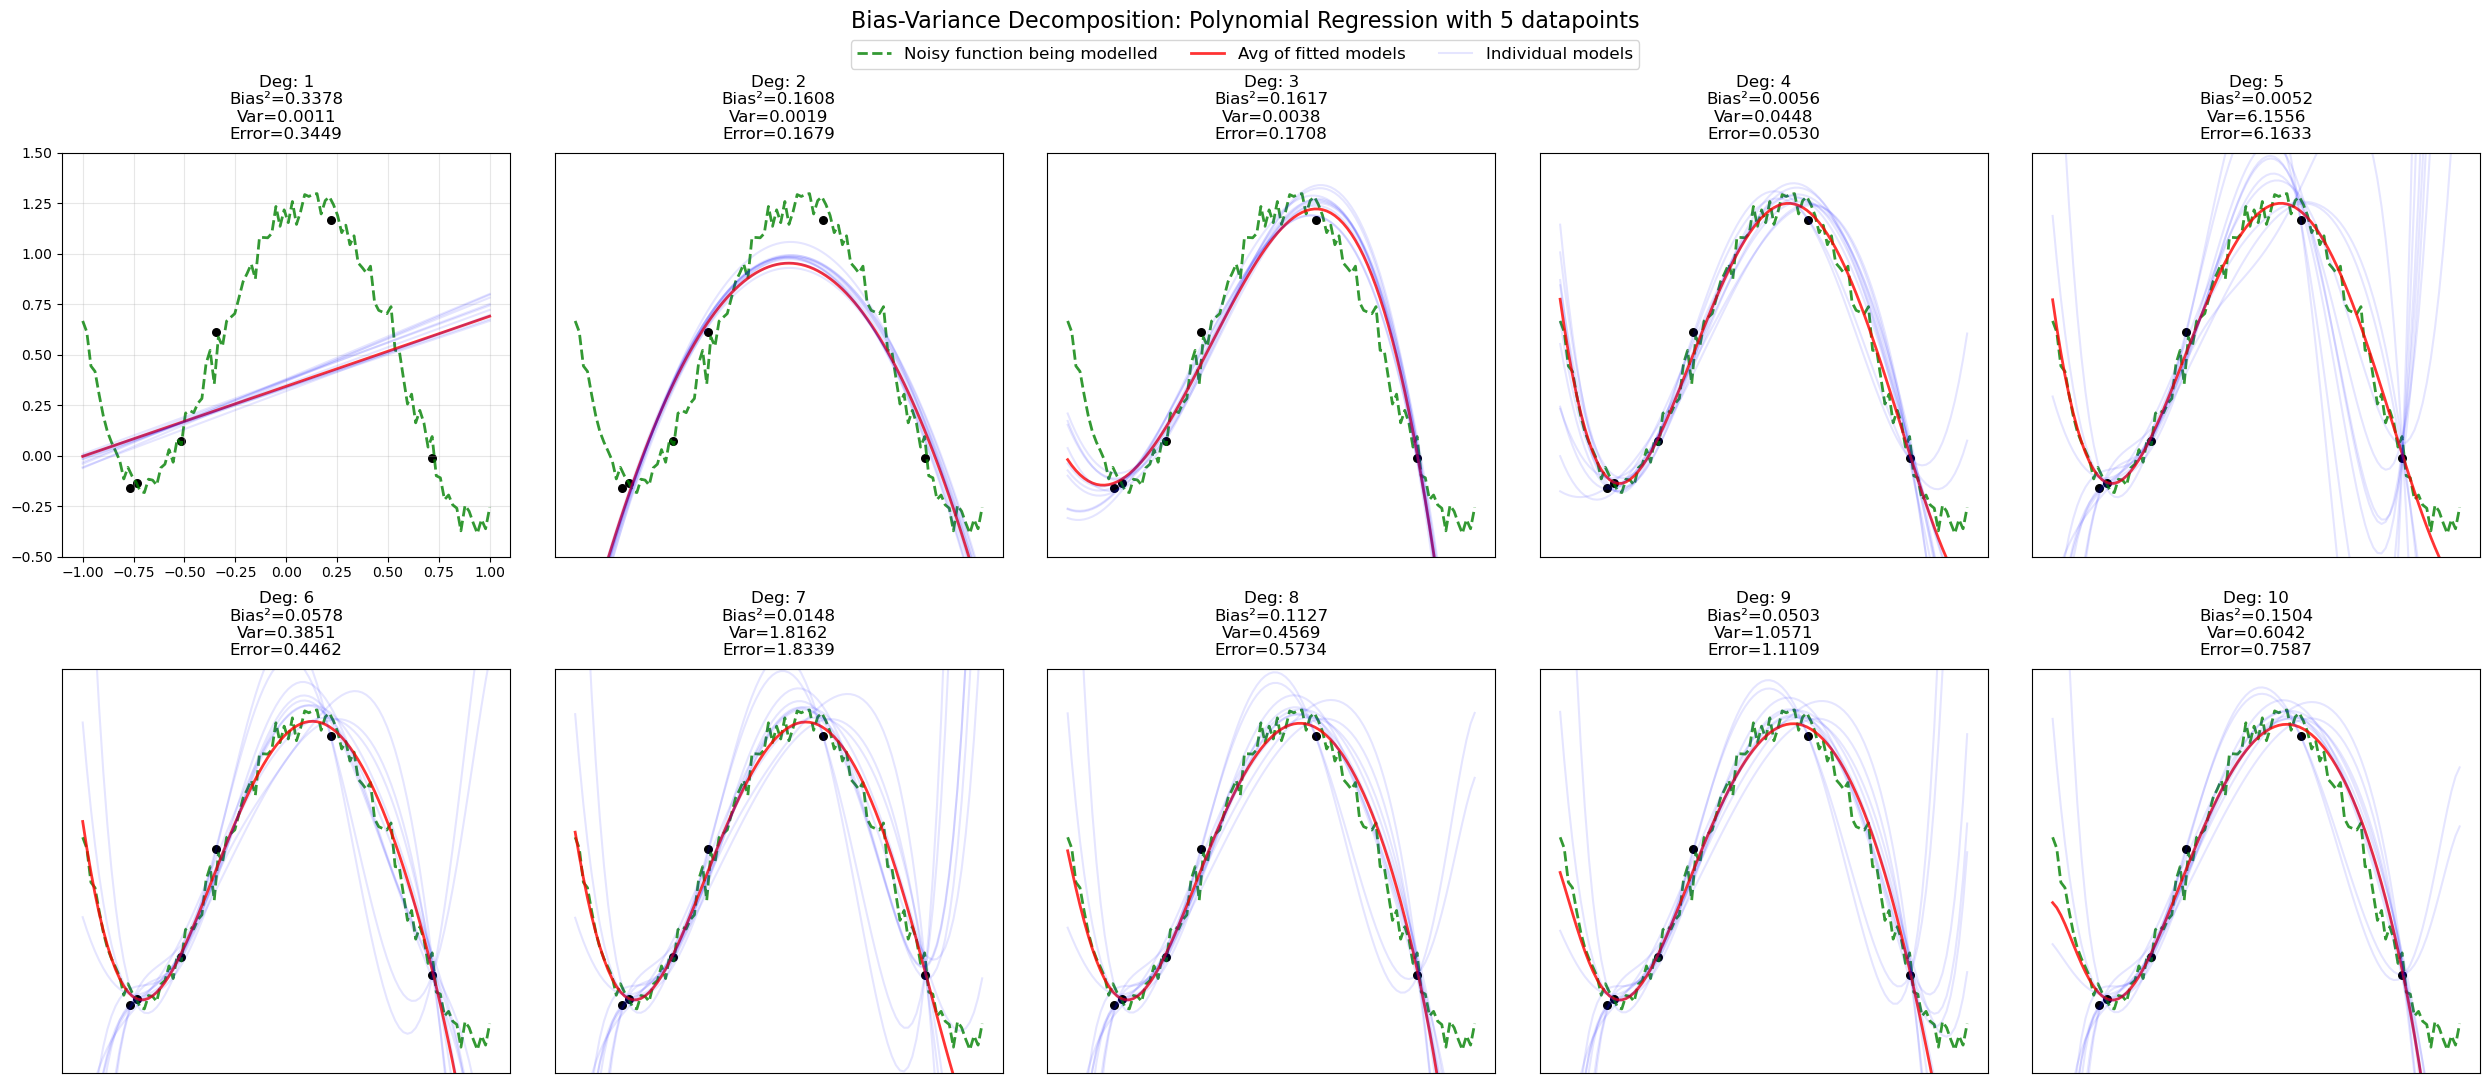

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Constants
n_points = 6
n_trials = 300
n_test = 100
noise_level = 0.05
degrees = range(1, 11)

# Generate 30 sets of 5 training points
X_trains = []
y_trains = []

#We fix the training points for all runs
X_train = np.random.uniform(-1, 1, n_points)
for _ in range(n_trials):
    
    y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
    X_trains.append(X_train)
    y_trains.append(y_train)

# Test points for evaluation
X_test = np.linspace(-1, 1, n_test)
y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
# Generate test truth without noise
y_test_true = func(X_test)

# Store predictions for both test and training sets
test_predictions = np.zeros((len(degrees), n_trials, n_test))

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# For each degree
for i, degree in enumerate(degrees):
    # For each trial
    for j in range(n_trials):
        # Create polynomial features
        X_train_poly = create_polynomial_features(X_trains[j], degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        
        # Fit using pseudoinverse
        beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
        
        # Store predictions for both sets
        test_predictions[i, j] = X_test_poly @ beta

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_predictions

# Shape: (10, 30, 100) = (degrees, trials, test_points)
test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

# Shape: (10, 30, 100) = (degrees, trials, test_points)
squared_errors = (test_predictions - test_values_broadcast)**2

# Average squared error across trials and test points
# Shape: (10,) = (degrees,)
test_mse = np.mean(squared_errors, axis=(1,2))

#Breaking down the error into bias, variance and irreducible noise

#Bias² of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
mean_pred_by_degree = np.mean(test_predictions, axis=1)

# Shape: (10, 100) = (degrees, test_points)
true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

# Shape: (10, 100) = (degrees, test_points) 
squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
test_bias = np.mean(squared_bias_by_point, axis=1)

# Variance of predictions at each degree and test point
# Shape: (10, 100) = (degrees, test_points)
variance_by_point = np.var(test_predictions, axis=1)
test_variance = np.mean(variance_by_point, axis=1)

#Noise
irreducible_noise = (y_test_true - y_test)**2
# Shape: (10, 100) = (degrees, test_points)
noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
test_noise = np.mean(noise_broadcast, axis=1)


# Create figure
fig = plt.figure(figsize=(25, 11))  # Increased height slightly

# Add overall title
fig.suptitle('Bias-Variance Decomposition: Polynomial Regression with 5 datapoints', fontsize=16, y=0.98)

# Create common legend entries for all subplots
lines = []
labels = []
temp_ax = plt.subplot(2, 5, 1)
l1, = temp_ax.plot([], [], '--', color='green', label='Noisy function being modelled', alpha=0.8, linewidth=2)
l2, = temp_ax.plot([], [], 'r-', label='Avg of fitted models', alpha=0.8, linewidth=2)
l3, = temp_ax.plot([], [], 'b-', label='Individual models', alpha=0.1)
lines = [l1, l2, l3]
labels = ['Noisy function being modelled', 'Avg of fitted models', 'Individual models']

# Create legend at the top
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96),
          ncol=3, fontsize=12)

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 5, i)
    
    # Plot true function
    plt.plot(X_test, y_test, '--', color='green', alpha=0.8, linewidth=2)
    
    # Plot mean prediction
    plt.plot(X_test, mean_pred_by_degree[i-1], 'r-', alpha=0.8, linewidth=2)

    # Plot training points from first trial (as an example)
    plt.scatter(X_trains[2], y_trains[2], color='black', s=30, label='Training points')
    
    # Plot individual predictions (sample)
    for j in range(min(10, n_trials)):
        plt.plot(X_test, test_predictions[i-1, j], 'b-', alpha=0.1)
    
    plt.title(f'Deg: {degree}\nBias²={test_bias[i-1]:.4f}\nVar={test_variance[i-1]:.4f}\nError={test_mse[i-1]:.4f}',
              pad=10, fontsize=12)  # Increased fontsize
    plt.ylim(-0.5, 1.5)
    
    # Only show tick labels for leftmost plots
    if i != 1:
        plt.yticks([])
        plt.xticks([])
    
    plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
# Adjust the top margin to make room for title and legend
plt.subplots_adjust(top=0.85, wspace=0.1)  # Reduced wspace since we removed most tick labels
plt.show()

Random X error, need to take expectation over initial data points

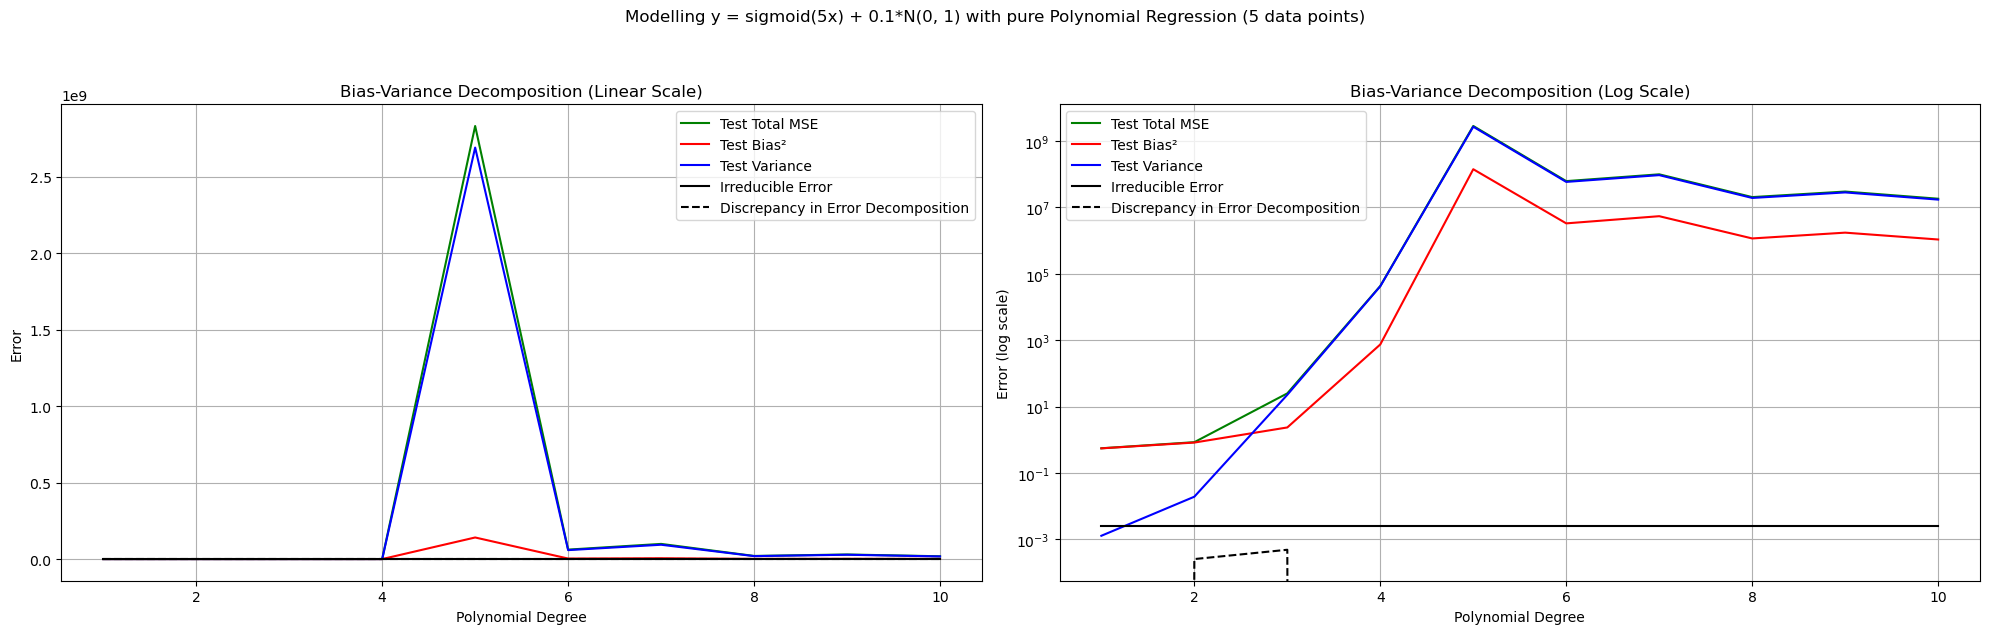

'print("\nNumerical Results:")\nfor degree in degrees:\n    idx = degree - 1\n    print(f"\nDegree {degree}:")\n    print(f"Bias²: {test_bias[idx]:.4f}")\n    print(f"Variance: {test_variance[idx]:.4f}")\n    print(f"Total Error: {(test_mse[idx]):.4f}")'

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(45)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# Constants
n_points = 6
n_trials = 30
n_test = 100
noise_level = 0.05
degrees = range(1, 11)
n_Xruns = 1000

test_mse = []
test_bias = []
test_variance = []
test_noise = []

for _ in range(n_Xruns):   
    # Generate 30 y-value sets of 5 X training points
    X_trains = []
    y_trains = []

    #We fix the training points for all runs
    X_train = np.random.uniform(-1, 1, n_points)
    for _ in range(n_trials):
        
        y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
        X_trains.append(X_train)
        y_trains.append(y_train)

    # Test points for evaluation
    X_test = np.linspace(-1, 1, n_test)
    y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
    # Generate test truth without noise
    y_test_true = func(X_test)

    # Store predictions
    test_predictions = np.zeros((len(degrees), n_trials, n_test))

    # For each degree
    for i, degree in enumerate(degrees):
        # For each trial
        for j in range(n_trials):
            # Create polynomial features
            X_train_poly = create_polynomial_features(X_trains[j], degree)
            X_test_poly = create_polynomial_features(X_test, degree)
            
            # Fit using pseudoinverse
            beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
            
            # Store predictions for both sets
            test_predictions[i, j] = X_test_poly @ beta

    # Shape: (10, 30, 100) = (degrees, trials, test_points)
    test_predictions

    # Shape: (10, 30, 100) = (degrees, trials, test_points)
    test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

    # Shape: (10, 30, 100) = (degrees, trials, test_points)
    squared_errors = (test_predictions - test_values_broadcast)**2

    # Average squared error across trials and test points
    # Shape: (10,) = (degrees,)
    test_mse.append(np.mean(squared_errors, axis=(1,2)))

    #Breaking down the error into bias, variance and irreducible noise

    #Bias² of predictions at each degree and test point
    # Shape: (10, 100) = (degrees, test_points)
    mean_pred_by_degree = np.mean(test_predictions, axis=1)

    # Shape: (10, 100) = (degrees, test_points)
    true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

    # Shape: (10, 100) = (degrees, test_points) 
    squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
    test_bias.append(np.mean(squared_bias_by_point, axis=1) )

    # Variance of predictions at each degree and test point
    # Shape: (10, 100) = (degrees, test_points)
    variance_by_point = np.var(test_predictions, axis=1)
    test_variance.append(np.mean(variance_by_point, axis=1))

    #Noise
    irreducible_noise = (y_test_true - y_test)**2
    # Shape: (10, 100) = (degrees, test_points)
    noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
    test_noise.append(np.mean(noise_broadcast, axis=1))

test_mse = np.stack(test_mse)
test_mse = np.mean(test_mse, axis=0)

test_bias = np.stack(test_bias)
test_bias = np.mean(test_bias, axis=0)

test_variance = np.stack(test_variance)
test_variance = np.mean(test_variance, axis=0)

test_noise = np.stack(test_noise)
test_noise = np.mean(test_noise, axis=0)



plt.figure(figsize=(20, 6))

# Linear scale subplot
plt.subplot(121)
plt.plot(degrees, test_mse, 'g-', label='Test Total MSE')
plt.plot(degrees, test_bias, 'r-', label='Test Bias²')
plt.plot(degrees, test_variance, 'b-', label='Test Variance')
plt.plot(degrees, test_noise, 'k-', label='Irreducible Error')
plt.plot(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
         label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(122)
plt.semilogy(degrees, test_mse, 'g-', label='Test Total MSE')
plt.semilogy(degrees, test_bias, 'r-', label='Test Bias²')
plt.semilogy(degrees, test_variance, 'b-', label='Test Variance')
plt.semilogy(degrees, test_noise, 'k-', label='Irreducible Error')
plt.semilogy(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
            label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error (log scale)')
plt.title('Bias-Variance Decomposition (Log Scale)')
plt.legend()
plt.grid(True)

plt.suptitle('Modelling y = sigmoid(5x) + 0.1*N(0, 1) with pure Polynomial Regression (5 data points)', y=1.05)
plt.tight_layout()
plt.show()
# Print numerical results
'''print("\nNumerical Results:")
for degree in degrees:
    idx = degree - 1
    print(f"\nDegree {degree}:")
    print(f"Bias²: {test_bias[idx]:.4f}")
    print(f"Variance: {test_variance[idx]:.4f}")
    print(f"Total Error: {(test_mse[idx]):.4f}")'''

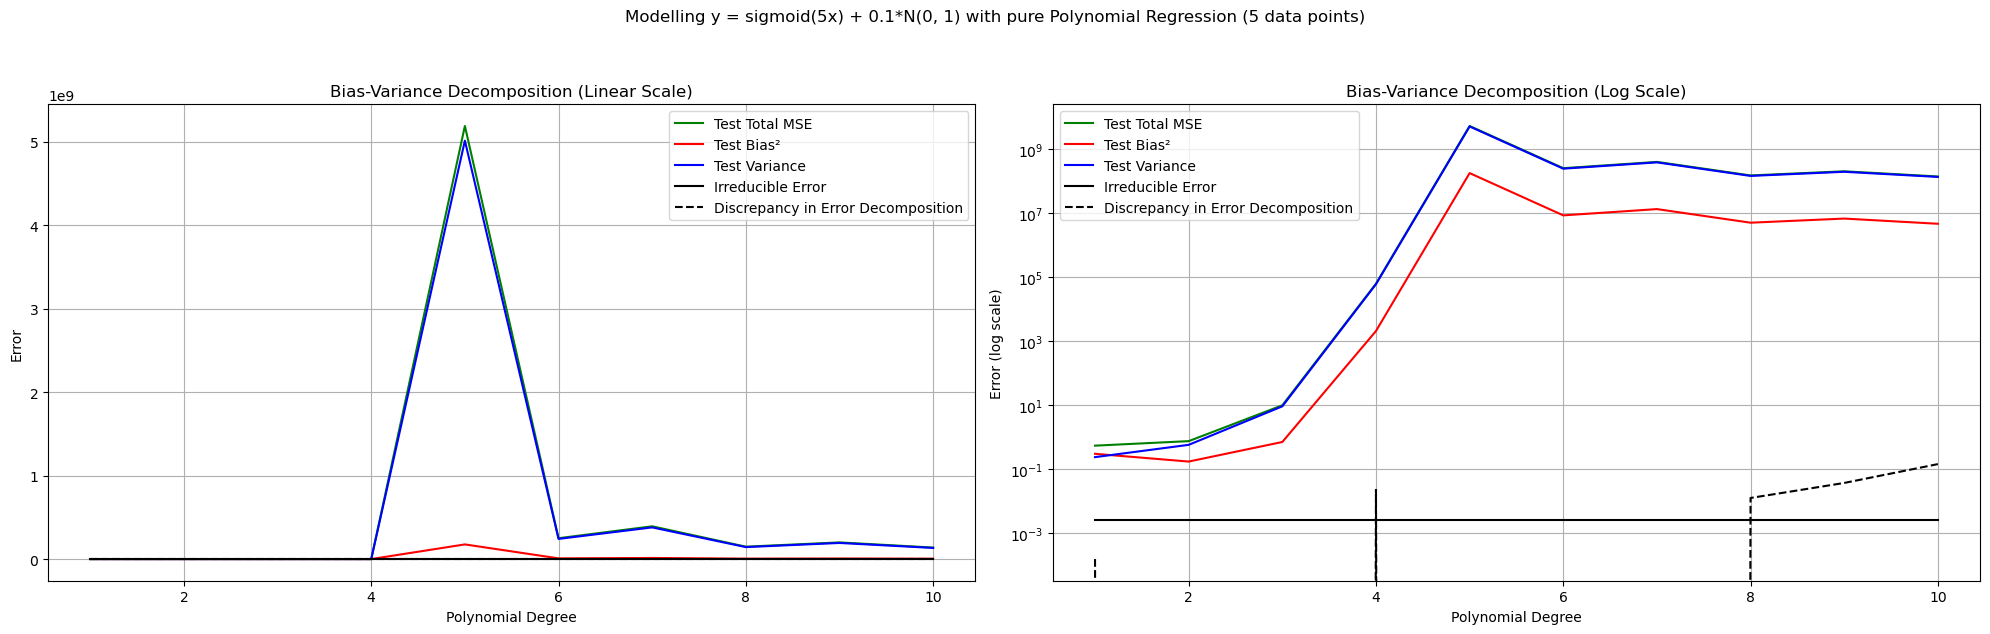

'print("\nNumerical Results:")\nfor degree in degrees:\n    idx = degree - 1\n    print(f"\nDegree {degree}:")\n    print(f"Bias²: {test_bias[idx]:.4f}")\n    print(f"Variance: {test_variance[idx]:.4f}")\n    print(f"Total Error: {(test_mse[idx]):.4f}")'

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(43)

#Function to model
def func(x):
    return 0.5*x**5 + 3*x**4 - 2*x**3 + -4*x**2 + x + 1.2

# Function to create polynomial features
def create_polynomial_features(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

# Constants
n_points = 6
n_trials = 30
n_test = 100
noise_level = 0.05
degrees = range(1, 11)
n_Xruns = 1000

test_mse = []
test_bias = []
test_variance = []
test_noise = []

for _ in range(n_Xruns):   
    # Generate 30 y-value sets of 5 X training points
    X_trains = []
    y_trains = []

    for _ in range(n_trials):
        #diff input points for each run - just do 2 loops to match the other one
        X_train = np.random.uniform(-1, 1, n_points)
        y_train = func(X_train) + noise_level * np.random.normal(0, 1, n_points)
        X_trains.append(X_train)
        y_trains.append(y_train)

    # Test points for evaluation
    X_test = np.linspace(-1, 1, n_test)
    y_test = func(X_test) + noise_level * np.random.normal(0, 1, n_test)
    # Generate test truth without noise
    y_test_true = func(X_test)

    # Store predictions
    test_predictions = np.zeros((len(degrees), n_trials, n_test))

    # For each degree
    for i, degree in enumerate(degrees):
        # For each trial
        for j in range(n_trials):
            # Create polynomial features
            X_train_poly = create_polynomial_features(X_trains[j], degree)
            X_test_poly = create_polynomial_features(X_test, degree)
            
            # Fit using pseudoinverse
            beta = np.linalg.pinv(X_train_poly) @ y_trains[j]
            
            # Store predictions for both sets
            test_predictions[i, j] = X_test_poly @ beta

    # Shape: (10, 30, 100) = (degrees, trials, test_points)
    test_predictions

    # Shape: (10, 30, 100) = (degrees, trials, test_points)
    test_values_broadcast = np.broadcast_to(y_test.reshape(1, 1, -1), test_predictions.shape)

    # Shape: (10, 30, 100) = (degrees, trials, test_points)
    squared_errors = (test_predictions - test_values_broadcast)**2

    # Average squared error across trials and test points
    # Shape: (10,) = (degrees,)
    test_mse.append(np.mean(squared_errors, axis=(1,2)))

    #Breaking down the error into bias, variance and irreducible noise

    #Bias² of predictions at each degree and test point
    # Shape: (10, 100) = (degrees, test_points)
    mean_pred_by_degree = np.mean(test_predictions, axis=1)

    # Shape: (10, 100) = (degrees, test_points)
    true_values_broadcast = np.broadcast_to(y_test_true.reshape(1, -1), mean_pred_by_degree.shape)

    # Shape: (10, 100) = (degrees, test_points) 
    squared_bias_by_point = (mean_pred_by_degree - true_values_broadcast)**2
    test_bias.append(np.mean(squared_bias_by_point, axis=1) )

    # Variance of predictions at each degree and test point
    # Shape: (10, 100) = (degrees, test_points)
    variance_by_point = np.var(test_predictions, axis=1)
    test_variance.append(np.mean(variance_by_point, axis=1))

    #Noise
    irreducible_noise = (y_test_true - y_test)**2
    # Shape: (10, 100) = (degrees, test_points)
    noise_broadcast = np.broadcast_to(irreducible_noise.reshape(1, -1), mean_pred_by_degree.shape)
    test_noise.append(np.mean(noise_broadcast, axis=1))

test_mse = np.stack(test_mse)
test_mse = np.mean(test_mse, axis=0)

test_bias = np.stack(test_bias)
test_bias = np.mean(test_bias, axis=0)

test_variance = np.stack(test_variance)
test_variance = np.mean(test_variance, axis=0)

test_noise = np.stack(test_noise)
test_noise = np.mean(test_noise, axis=0)



plt.figure(figsize=(20, 6))

# Linear scale subplot
plt.subplot(121)
plt.plot(degrees, test_mse, 'g-', label='Test Total MSE')
plt.plot(degrees, test_bias, 'r-', label='Test Bias²')
plt.plot(degrees, test_variance, 'b-', label='Test Variance')
plt.plot(degrees, test_noise, 'k-', label='Irreducible Error')
plt.plot(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
         label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale subplot
plt.subplot(122)
plt.semilogy(degrees, test_mse, 'g-', label='Test Total MSE')
plt.semilogy(degrees, test_bias, 'r-', label='Test Bias²')
plt.semilogy(degrees, test_variance, 'b-', label='Test Variance')
plt.semilogy(degrees, test_noise, 'k-', label='Irreducible Error')
plt.semilogy(degrees, test_mse - test_noise - test_bias - test_variance, 'k--', 
            label='Discrepancy in Error Decomposition')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error (log scale)')
plt.title('Bias-Variance Decomposition (Log Scale)')
plt.legend()
plt.grid(True)

plt.suptitle('Modelling y = sigmoid(5x) + 0.1*N(0, 1) with pure Polynomial Regression (5 data points)', y=1.05)
plt.tight_layout()
plt.show()
# Print numerical results
'''print("\nNumerical Results:")
for degree in degrees:
    idx = degree - 1
    print(f"\nDegree {degree}:")
    print(f"Bias²: {test_bias[idx]:.4f}")
    print(f"Variance: {test_variance[idx]:.4f}")
    print(f"Total Error: {(test_mse[idx]):.4f}")'''